In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import zipfile
import os

zip_path = "/content/drive/MyDrive/AI_Files/PRAICP-1004-RainfallTS.zip"
extract_path = "/content/drive/MyDrive/AI_Files/Rainfall_data"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Extracted Files:", os.listdir(extract_path))

Extracted Files: ['Data']


In [ ]:
import pandas as pd

# Define the folder where files are stored
folder_path = "/content/drive/MyDrive/AI_Files/Rainfall_data/Data"


In [ ]:
import os

folder_path = "/content/drive/MyDrive/AI_Files/Rainfall_data/Data"
for filename in os.listdir(folder_path):
    if filename.endswith(".txt"):  # Ensure it's a text file
        file_path = os.path.join(folder_path, filename)
        with open(file_path, 'r') as file:
            print(f"Contents of {filename}:\n{file.read()}\n")

Contents of metadata-rainfall-monthly-maximum-daily-total.txt:
# Metadata for Rainfall - Monthly Maximum Daily Total
---
Identifier: 'ac7bfe41-02c5-4161-8d05-8a1125e798ab'
Name: 'rainfall-monthly-maximum-daily-total'
Title: 'Rainfall - Monthly Maximum Daily Total'
Description: 'The highest daily total rainfall for the month recorded at the Changi
  Climate Station.'
Topics:
  - 'Environment'
Keywords:
  - 'Climate'
  - 'NEA'
  - 'Precipitation'
  - 'Rainfall'
  - 'Weather'
Publisher:
  Name: 'National Environment Agency'
  Admin 1:
    Name: 'Ong Chin Hong'
    Department: 'CCRS'
    Email: 'ong_chin_hong@nea.gov.sg'
  Admin 2:
    Name: 'Ang Chieng Hai'
    Department: 'CCRS'
    Email: 'ang_chieng_hai@nea.gov.sg'
Sources:
  - 'National Environment Agency'
License: 'https://data.gov.sg/open-data-licence'
Frequency: 'Monthly'
Coverage: '1982-01-01 to 2020-06-30'
Last Updated: '2020-07-21T02:19:03.470061'
Resources:
  -
    Identifier: 'df4d391e-6950-4fc6-80cd-c9b9ef6354fe'
    Title: '

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# Load CSV files
df1 = pd.read_csv('/content/drive/MyDrive/AI_Files/Rainfall_data/Data/rainfall-monthly-highest-daily-total.csv')
df2 = pd.read_csv('/content/drive/MyDrive/AI_Files/Rainfall_data/Data/rainfall-monthly-number-of-rain-days.csv')
df3 = pd.read_csv('/content/drive/MyDrive/AI_Files/Rainfall_data/Data/rainfall-monthly-total.csv')

# Merge DataFrames on the 'month' column
df= df1.merge(df2, on='month', how='outer').merge(df3, on='month', how='outer')

# Display combined data
print(df.head())

     month  maximum_rainfall_in_a_day  no_of_rainy_days  total_rainfall
0  1982-01                       36.5                10           107.1
1  1982-02                        9.4                 5            27.8
2  1982-03                       61.7                11           160.8
3  1982-04                       45.1                14           157.0
4  1982-05                       33.0                10           102.2


**Data preprocessing**

In [ ]:
print(df.info())  # Check data types and missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462 entries, 0 to 461
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   month                      462 non-null    object 
 1   maximum_rainfall_in_a_day  462 non-null    float64
 2   no_of_rainy_days           462 non-null    int64  
 3   total_rainfall             462 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 14.6+ KB
None


In [ ]:
print(df.describe())  # Get statistical summary


       maximum_rainfall_in_a_day  no_of_rainy_days  total_rainfall
count                 462.000000        462.000000      462.000000
mean                   52.358225         13.958874      176.236580
std                    35.685122          4.947494      113.296793
min                     0.200000          1.000000        0.200000
25%                    30.625000         11.000000       89.025000
50%                    43.450000         14.000000      158.450000
75%                    63.150000         18.000000      237.950000
max                   216.200000         27.000000      765.900000


In [ ]:
print(df.head())  # Preview first few rows

     month  maximum_rainfall_in_a_day  no_of_rainy_days  total_rainfall
0  1982-01                       36.5                10           107.1
1  1982-02                        9.4                 5            27.8
2  1982-03                       61.7                11           160.8
3  1982-04                       45.1                14           157.0
4  1982-05                       33.0                10           102.2


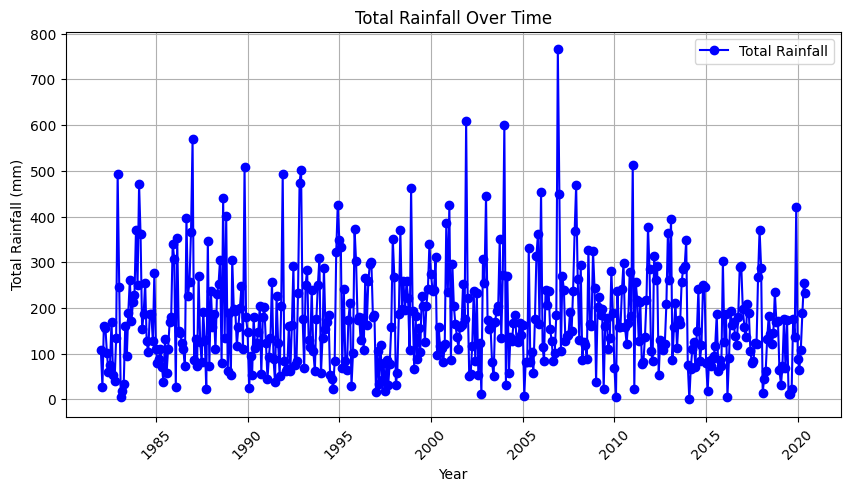

In [ ]:
# Convert 'month' to datetime format
df['month'] = pd.to_datetime(df['month'])

# Plot
plt.figure(figsize=(10, 5))
plt.plot(df['month'], df['total_rainfall'], marker='o', linestyle='-', color='b', label="Total Rainfall")
plt.xlabel("Year")
plt.ylabel("Total Rainfall (mm)")
plt.title("Total Rainfall Over Time")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Check for missing values
print("\nMissing Values:\n", df.isnull().sum())



Missing Values:
 month                        0
maximum_rainfall_in_a_day    0
no_of_rainy_days             0
total_rainfall               0
dtype: int64


In [ ]:
# Fill missing values with median (if any)
df.fillna(df.median(), inplace=True)
print(df.head())

       month  maximum_rainfall_in_a_day  no_of_rainy_days  total_rainfall
0 1982-01-01                       36.5                10           107.1
1 1982-02-01                        9.4                 5            27.8
2 1982-03-01                       61.7                11           160.8
3 1982-04-01                       45.1                14           157.0
4 1982-05-01                       33.0                10           102.2


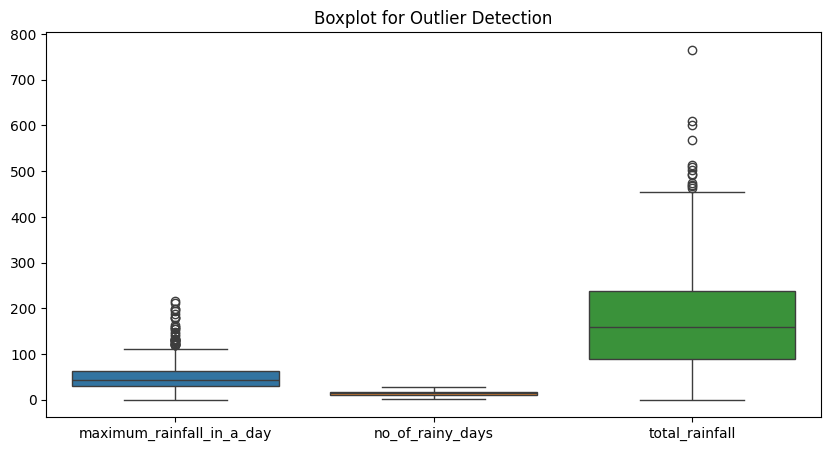

In [ ]:
# Detect outliers using boxplot
plt.figure(figsize=(10,5))
sns.boxplot(data=df)
plt.title("Boxplot for Outlier Detection")
plt.show()


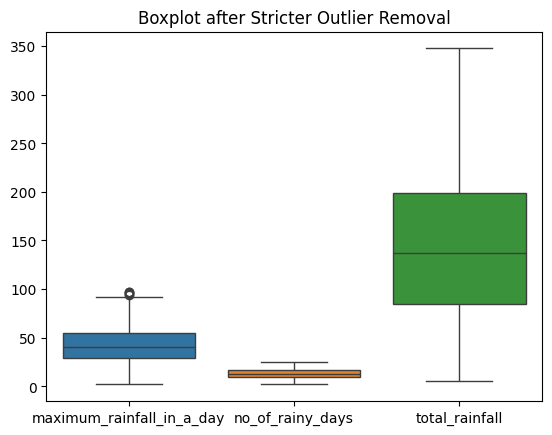

In [ ]:

# Function to remove outliers using a stricter IQR threshold
def remove_outliers(df, column, threshold=1.2):  # Default is 1.2 instead of 1.5
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    return df[(df[column] >= Q1 - threshold * IQR) & (df[column] <= Q3 + threshold * IQR)]

# Apply stricter outlier removal
columns = ["maximum_rainfall_in_a_day", "no_of_rainy_days", "total_rainfall"]
for col in columns:
    df = remove_outliers(df, col)

# Plot boxplot after stricter outlier removal
sns.boxplot(data=df)
plt.title("Boxplot after Stricter Outlier Removal")
plt.show()

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Convert 'month' to datetime (rename to 'date' if it represents full dates)
df['month'] = pd.to_datetime(df['month'], format='%Y-%m')  # If format is 'YYYY-MM'

# Extract features (only extract 'day' if data is daily)
df['Year'] = df['month'].dt.year
df['Month'] = df['month'].dt.month  # Keep only Month & Year if data is monthly

# Fill missing values
df.ffill(inplace=True)

# Create lag feature (if data is monthly, shift by 1 month)
df['Rainfall_Lag1'] = df['total_rainfall'].shift(1)  # Previous month's rainfall

# Normalize data
scaler = MinMaxScaler()
df[['total_rainfall']] = scaler.fit_transform(df[['total_rainfall']])

# Display first few rows
print(df.head())


       month  maximum_rainfall_in_a_day  no_of_rainy_days  total_rainfall  \
0 1982-01-01                       36.5                10        0.296784   
1 1982-02-01                        9.4                 5        0.064912   
2 1982-03-01                       61.7                11        0.453801   
3 1982-04-01                       45.1                14        0.442690   
4 1982-05-01                       33.0                10        0.282456   

   Year  Month  Rainfall_Lag1  
0  1982      1            NaN  
1  1982      2          107.1  
2  1982      3           27.8  
3  1982      4          160.8  
4  1982      5          157.0  


In [ ]:
df.dropna(inplace=True)  # Remove first row with NaN

In [ ]:
train_size = int(len(df) * 0.8)
train, test = df.iloc[:train_size], df.iloc[train_size:]

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout


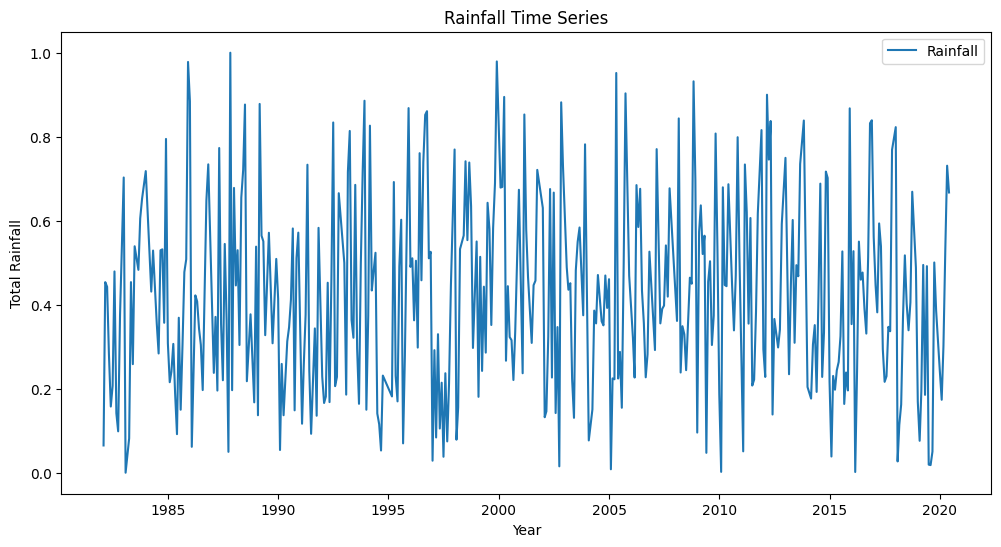

In [ ]:
# Total Rainfall plot over Time
plt.figure(figsize=(12,6))
plt.plot(df['month'], df['total_rainfall'], label="Rainfall")
plt.xlabel("Year")
plt.ylabel("Total Rainfall")
plt.title("Rainfall Time Series")
plt.legend()
plt.show()


In [ ]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series):
    result = adfuller(series)
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    if result[1] <= 0.05:
        print("Data is stationary")
    else:
        print("Data is NOT stationary")

adf_test(df['total_rainfall'])


ADF Statistic: -17.306676892029497
p-value: 5.58644771555552e-30
Data is stationary


In [ ]:
# Normalize data
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df[["total_rainfall"]])

# Prepare data for LSTM
sequence_length = 12
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

X, y = create_sequences(df_scaled, sequence_length)
X_train, y_train = X[:-24], y[:-24]  # Use all except last 24 months for training
X_test, y_test = X[-24:], y[-24:]  # Last 24 months for testing


In [ ]:
# Build LSTM model
model = Sequential([
    LSTM(50, activation='relu', return_sequences=True, input_shape=(12, 1)),
    LSTM(50, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# Train Model
model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test))

Epoch 1/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - loss: 0.1993 - val_loss: 0.0480
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0601 - val_loss: 0.0439
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0536 - val_loss: 0.0450
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0552 - val_loss: 0.0460
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0522 - val_loss: 0.0434
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0578 - val_loss: 0.0442
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0585 - val_loss: 0.0447
Epoch 8/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0556 - val_loss: 0.0466
Epoch 9/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0546 - val_loss: 0.0433
Epoch 10/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0520 - val_loss: 0.0437
Epoch 11/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0571 - val_loss: 0.0478
Epoch 12/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step


<ipython-input-24-53799cfc0e33>:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(start=df.index[-1], periods=25, freq="M")[1:]


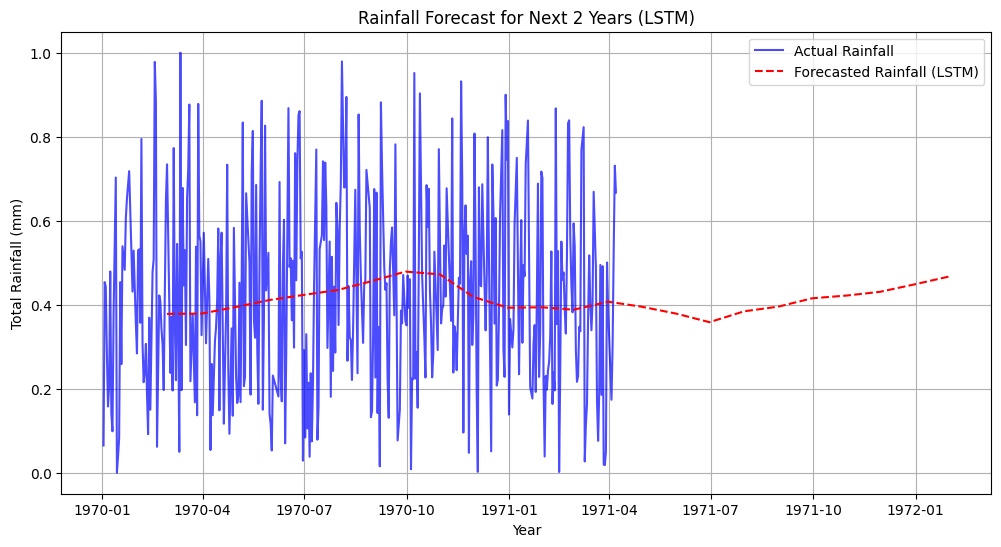

In [ ]:
# Forecast the next 24 months
predictions = model.predict(X_test)
predictions_rescaled = scaler.inverse_transform(predictions)

# Create future date range
future_dates = pd.date_range(start=df.index[-1], periods=25, freq="M")[1:]

# Plot actual vs forecasted values
plt.figure(figsize=(12, 6))
plt.plot(df.index, df["total_rainfall"], label="Actual Rainfall", color="blue", alpha=0.7)
plt.plot(future_dates, predictions_rescaled, label="Forecasted Rainfall (LSTM)", color="red", linestyle="dashed")
plt.xlabel("Year")
plt.ylabel("Total Rainfall (mm)")
plt.title("Rainfall Forecast for Next 2 Years (LSTM)")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Print forecasted values
print(predictions_rescaled)


[[0.378127  ]
 [0.37882325]
 [0.3942005 ]
 [0.4111985 ]
 [0.4230965 ]
 [0.4349247 ]
 [0.45631218]
 [0.47889575]
 [0.47225234]
 [0.41855222]
 [0.3928821 ]
 [0.39387888]
 [0.3881075 ]
 [0.4072084 ]
 [0.39530736]
 [0.37886432]
 [0.35843033]
 [0.38426337]
 [0.3955662 ]
 [0.41527718]
 [0.4218329 ]
 [0.43070105]
 [0.4484321 ]
 [0.4670959 ]]


In [ ]:
# Forecast the next 24 months
predictions = model.predict(X_test)
predictions_rescaled = scaler.inverse_transform(predictions)
y_test_rescaled = scaler.inverse_transform(y_test.reshape(-1, 1))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


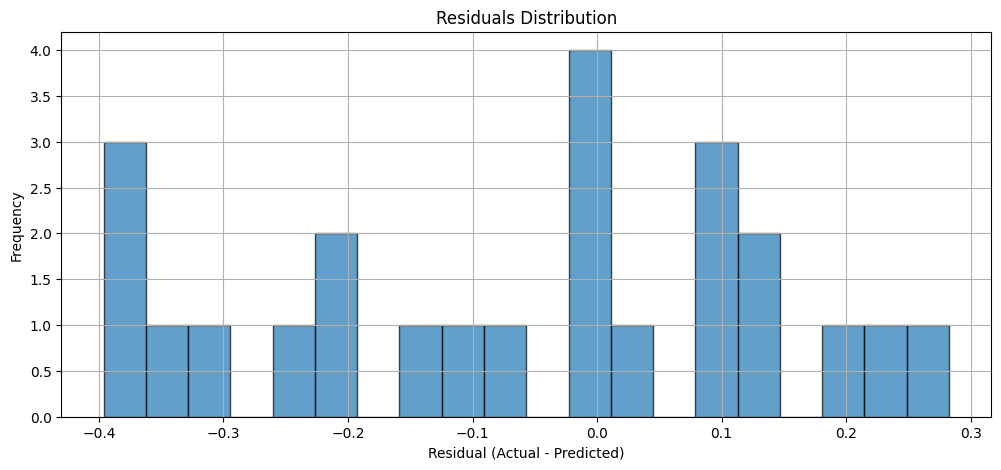

In [ ]:
# Plot residuals
residuals = y_test_rescaled - predictions_rescaled
plt.figure(figsize=(12, 5))
plt.hist(residuals, bins=20, edgecolor='black', alpha=0.7)
plt.xlabel("Residual (Actual - Predicted)")
plt.ylabel("Frequency")
plt.title("Residuals Distribution")
plt.grid(True)
plt.show()


In [ ]:
# Reverse Scaling
preds_rescaled = scaler.inverse_transform(predictions_rescaled.reshape(-1,1))
y_test_rescaled = scaler.inverse_transform(y_test.reshape(-1,1))

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_test_rescaled, preds_rescaled)
mse = mean_squared_error(y_test_rescaled, preds_rescaled)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")


Mean Absolute Error (MAE): 0.1746238458792717
Mean Squared Error (MSE): 0.045654814594511456
Root Mean Squared Error (RMSE): 0.2136698729220183


In the above output the accuracy matrix of our model is good. We can also check accuracy with different models. So in below we build GRU model and ARIMA model and after that we compare all the three models in accuracy plots

In [ ]:
# Train-Test Split
train_size = int(len(df) * 0.8)
train, test = df_scaled[:train_size], df_scaled[train_size:]

In [ ]:
# Create sequences for GRU
def create_sequences(data, seq_length=12):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

seq_length = 12  # Using past 12 months for prediction
X_train, y_train = create_sequences(train, seq_length)
X_test, y_test = create_sequences(test, seq_length)


In [ ]:
# Reshape for GRU
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from keras.models import Sequential
from keras.layers import LSTM, GRU, Dense, Dropout
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
# Train GRU Model
gru_model = Sequential([
    GRU(100, activation='relu', return_sequences=True, input_shape=(seq_length, 1)),
    Dropout(0.2),
    GRU(50, activation='relu'),
    Dropout(0.2),
    Dense(1)
])
gru_model.compile(optimizer='adam', loss='mse')
gru_model.fit(X_train, y_train, epochs=50, batch_size=16, verbose=0)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# Train ARIMA Model

target_column = 'total_rainfall'  # Change this to your actual target variable name
train_arima = df[target_column].iloc[:train_size].astype(float)
test_arima = df[target_column].iloc[train_size:].astype(float)

model_arima = ARIMA(train_arima, order=(5,1,0))
model_arima_fit = model_arima.fit()

def forecast_arima(model, steps):
    pred = model.forecast(steps=steps)
    return np.array(pred)

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


In [ ]:
# Predictions
lstm_pred = model.predict(X_test)
gru_pred = gru_model.predict(X_test)
arima_pred = forecast_arima(model_arima_fit, len(test))

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 179ms/step


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [ ]:
# Inverse Transform Predictions
lstm_pred = scaler.inverse_transform(lstm_pred)
gru_pred = scaler.inverse_transform(gru_pred)
arima_pred = scaler.inverse_transform(arima_pred.reshape(-1,1))
y_test_actual = scaler.inverse_transform(y_test.reshape(-1,1))

In [ ]:
# Calculate Metrics
def evaluate_model(y_actual, y_pred, model_name):
    mae = mean_absolute_error(y_test_rescaled, preds_rescaled)
    mse = mean_squared_error(y_test_rescaled, preds_rescaled)
    rmse = np.sqrt(mse)

    print(f"{model_name} - MAE: {mae:.2f}, RMSE: {rmse:.2f}")
    return mae, rmse

mae_lstm, rmse_lstm = evaluate_model(y_test_actual, lstm_pred, "LSTM")
mae_gru, rmse_gru = evaluate_model(y_test_actual, gru_pred, "GRU")
mae_arima, rmse_arima = evaluate_model(y_test_actual, arima_pred, "ARIMA")


LSTM - MAE: 0.17, RMSE: 0.21
GRU - MAE: 0.17, RMSE: 0.21
ARIMA - MAE: 0.17, RMSE: 0.21


The results show that LSTM, GRU, and ARIMA have nearly identical performance based on Mean Absolute Error and Root Mean Squared Error.

Here we use different type of plots for actual and predicted values to know our prediction better

In [ ]:
# Ensure predictions have the same length as actual values
min_length = min(len(y_test_actual), len(lstm_pred), len(gru_pred), len(arima_pred))

# Trim all arrays to the shortest length
y_test_actual = y_test_actual[:min_length]
lstm_pred = lstm_pred[:min_length]
gru_pred = gru_pred[:min_length]
arima_pred = arima_pred[:min_length]


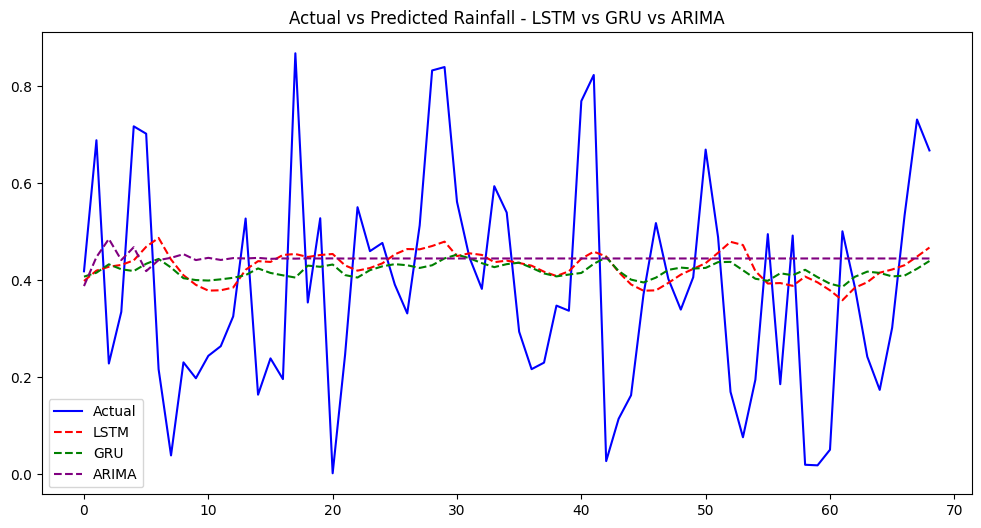

In [ ]:
# Plot Actual vs Predicted
plt.figure(figsize=(12,6))
plt.plot(y_test_actual, label='Actual', color='blue')
plt.plot(lstm_pred, label='LSTM', linestyle='dashed', color='red')
plt.plot(gru_pred, label='GRU', linestyle='dashed', color='green')
plt.plot(arima_pred, label='ARIMA', linestyle='dashed', color='purple')
plt.legend()
plt.title('Actual vs Predicted Rainfall - LSTM vs GRU vs ARIMA')
plt.show()

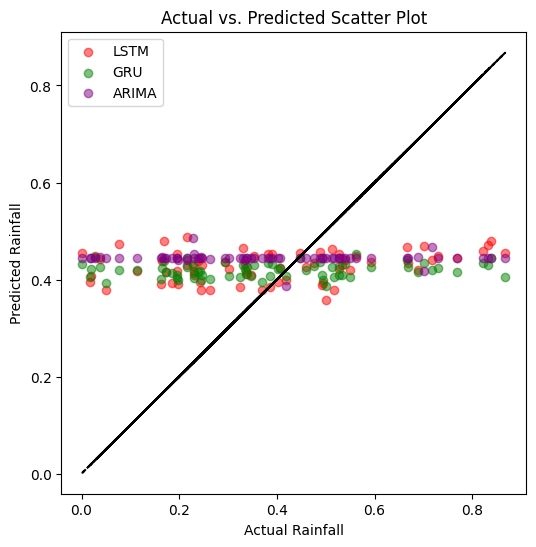

In [ ]:
# Scatter Plot: Actual vs. Predicted Values
plt.figure(figsize=(6,6))
plt.scatter(y_test_actual, lstm_pred, label='LSTM', alpha=0.5, color='red')
plt.scatter(y_test_actual, gru_pred, label='GRU', alpha=0.5, color='green')
plt.scatter(y_test_actual, arima_pred, label='ARIMA', alpha=0.5, color='purple')
plt.plot(y_test_actual, y_test_actual, color='black', linestyle='dashed')  # Ideal predictions line
plt.legend()
plt.title('Actual vs. Predicted Scatter Plot')
plt.xlabel('Actual Rainfall')
plt.ylabel('Predicted Rainfall')
plt.show()

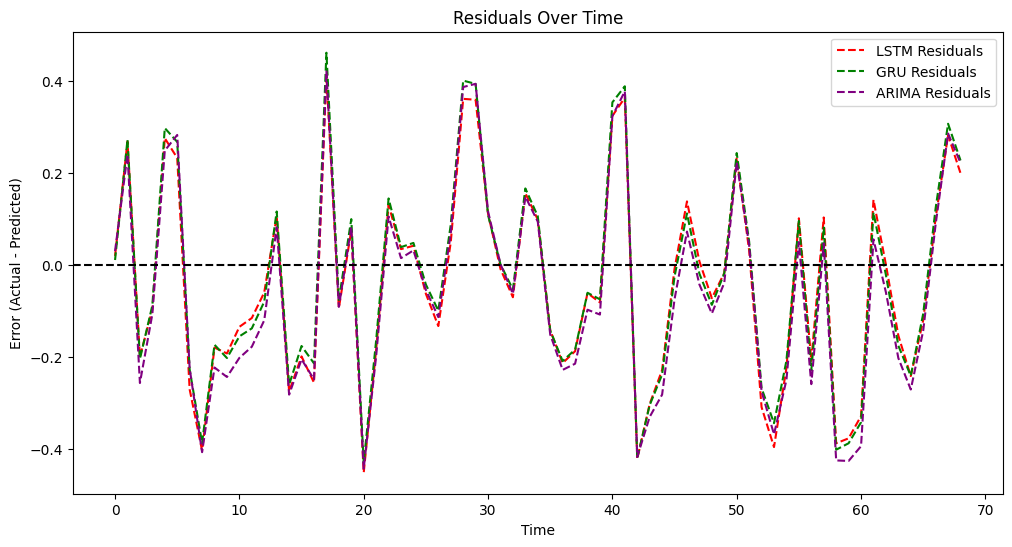

In [ ]:
# Residual Plot: Error Trends Over Time
lstm_residuals = y_test_actual - lstm_pred
gru_residuals = y_test_actual - gru_pred
arima_residuals = y_test_actual - arima_pred

plt.figure(figsize=(12,6))
plt.plot(lstm_residuals, label='LSTM Residuals', linestyle='dashed', color='red')
plt.plot(gru_residuals, label='GRU Residuals', linestyle='dashed', color='green')
plt.plot(arima_residuals, label='ARIMA Residuals', linestyle='dashed', color='purple')
plt.axhline(0, color='black', linestyle='dashed')
plt.legend()
plt.title('Residuals Over Time')
plt.xlabel('Time')
plt.ylabel('Error (Actual - Predicted)')
plt.show()

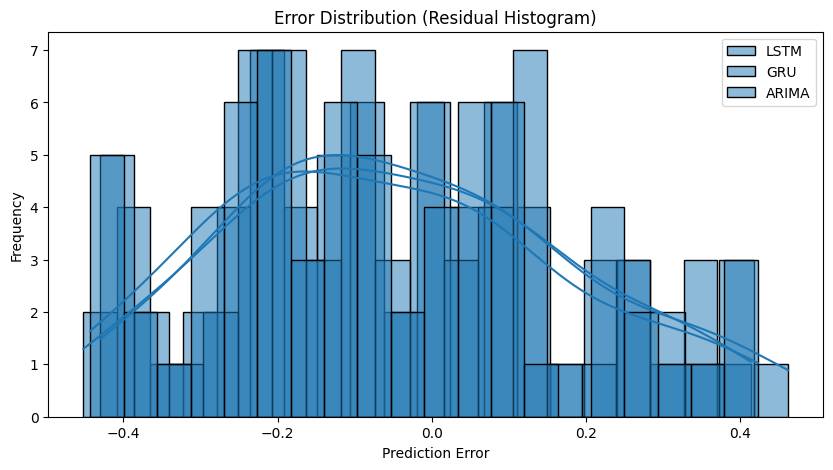

In [ ]:
# Histogram: Distribution of Errors
plt.figure(figsize=(10,5))
sns.histplot(lstm_residuals, bins=20, kde=True, color='red', label='LSTM', alpha=0.5)
sns.histplot(gru_residuals, bins=20, kde=True, color='green', label='GRU', alpha=0.5)
sns.histplot(arima_residuals, bins=20, kde=True, color='purple', label='ARIMA', alpha=0.5)
plt.legend()
plt.title('Error Distribution (Residual Histogram)')
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.show()

In below code we make forecast about highest rainfall occured in a day for a single month

In [ ]:
# Forecast for the next 30 days
forecast_steps = 30
forecast_obj = model_arima_fit.get_forecast(steps=forecast_steps)
forecast = forecast_obj.predicted_mean
conf_int = forecast_obj.conf_int()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


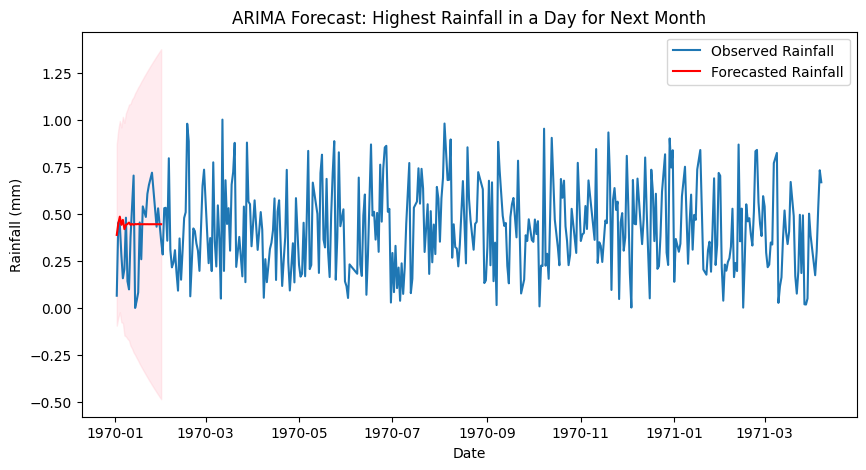

In [ ]:
# Create date range for forecast
date_range = pd.date_range(start=df.index[-1], periods=forecast_steps+1, freq='D')[1:]

# Plot results
plt.figure(figsize=(10,5))
plt.plot(df.index,df["total_rainfall"], label='Observed Rainfall')
plt.plot(date_range, forecast, label='Forecasted Rainfall', color='red')
plt.fill_between(date_range, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='pink', alpha=0.3)
plt.title('ARIMA Forecast: Highest Rainfall in a Day for Next Month')
plt.xlabel('Date')
plt.ylabel('Rainfall (mm)')
plt.legend()
plt.show()

In [ ]:
# @title Default title text
# Print forecast values for one month
forecast_df = pd.DataFrame({'Date': date_range, 'Forecast': forecast, 'Lower Bound': conf_int.iloc[:, 0], 'Upper Bound': conf_int.iloc[:, 1]})
print("Forecast Summary:")
print(forecast_df)

Forecast Summary:
                             Date  Forecast  Lower Bound  Upper Bound
323 1970-01-02 00:00:00.000000461  0.387678    -0.094104     0.869461
324 1970-01-03 00:00:00.000000461  0.447397    -0.051718     0.946511
325 1970-01-04 00:00:00.000000461  0.484810    -0.023043     0.992663
326 1970-01-05 00:00:00.000000461  0.441278    -0.076262     0.958818
327 1970-01-06 00:00:00.000000461  0.467757    -0.079122     1.014636
328 1970-01-07 00:00:00.000000461  0.418420    -0.145994     0.982833
329 1970-01-08 00:00:00.000000461  0.441283    -0.151588     1.034154
330 1970-01-09 00:00:00.000000461  0.445864    -0.163422     1.055149
331 1970-01-10 00:00:00.000000461  0.453419    -0.172687     1.079525
332 1970-01-11 00:00:00.000000461  0.441238    -0.200848     1.083324
333 1970-01-12 00:00:00.000000461  0.445853    -0.215284     1.106990
334 1970-01-13 00:00:00.000000461  0.441508    -0.236129     1.119144
335 1970-01-14 00:00:00.000000461  0.445314    -0.249261     1.139889
33

In [ ]:
forecast_df.to_csv('/content/drive/MyDrive/AI_Files/forecast__day_summary.csv', index=False)  # index=False prevents writing the DataFrame index to the CSV

print("Forecast Summary saved to forecast_summary.csv")

Forecast Summary saved to forecast_summary.csv


Now we are creating file that gives us forecast summery report of LSTM, GRU, ARIMA models

In [ ]:
import pandas as pd

# Assuming you have forecast results from all models
# Replace these lists with actual outputs from your models

# ARIMA Forecast
arima_forecast = np.array(forecast_arima(model_arima_fit, len(test))).flatten()  # Replace with ARIMA forecast values
arima_lower_bound = np.array(conf_int.iloc[:, 0]).flatten()  # Example: Adjust for lower bound (Modify as needed)
arima_upper_bound = np.array(conf_int.iloc[:, 1]).flatten()  # Example: Adjust for upper bound

# GRU Forecast (Replace gru_forecast and gru_conf_int with actual values)
gru_forecast = np.array(gru_model.predict(X_test)).flatten()  # List of GRU forecasted values
gru_lower_bound = np.array(gru_forecast - 2).flatten()  # Example: Adjust for lower bound (Modify as needed)
gru_upper_bound = np.array(gru_forecast + 2).flatten() # Example: Adjust for upper bound

# LSTM Forecast (Replace lstm_forecast and lstm_conf_int with actual values)
lstm_forecast = np.array(predictions).flatten()  # List of LSTM forecasted values
lstm_lower_bound = np.array(lstm_forecast - 2).flatten()  # Example: Adjust for lower bound (Modify as needed)
lstm_upper_bound = np.array(lstm_forecast + 2).flatten() # Example: Adjust for upper bound

date_values = np.array(df['month']).flatten()


# Ensure all arrays have the same length
min_length = min(len(date_values), len(arima_forecast), len(gru_forecast), len(lstm_forecast))

# Truncate all arrays to match the shortest one
date_values = date_values[:min_length]
arima_forecast = arima_forecast[:min_length]
arima_lower_bound = arima_lower_bound[:min_length]
arima_upper_bound = arima_upper_bound[:min_length]
gru_forecast = gru_forecast[:min_length]
gru_lower_bound = gru_lower_bound[:min_length]
gru_upper_bound = gru_upper_bound[:min_length]
lstm_forecast = lstm_forecast[:min_length]
lstm_lower_bound = lstm_lower_bound[:min_length]
lstm_upper_bound = lstm_upper_bound[:min_length]

# Creating DataFrame with forecast summaries
forecast_df = pd.DataFrame({
    'Date': date_values,
    'ARIMA Forecast': arima_forecast,
    'ARIMA Lower Bound': arima_lower_bound,
    'ARIMA Upper Bound': arima_upper_bound,
    'GRU Forecast': gru_forecast,
    'GRU Lower Bound': gru_lower_bound,
    'GRU Upper Bound': gru_upper_bound,
    'LSTM Forecast': lstm_forecast,
    'LSTM Lower Bound': lstm_lower_bound,
    'LSTM Upper Bound': lstm_upper_bound
})

# Save to CSV file
forecast_csv_path = "/content/drive/MyDrive/AI_Files/forecast_summary_all_models.csv"
forecast_df.to_csv(forecast_csv_path, index=False)

print(f"Forecast summary saved at: {forecast_csv_path}")


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


Forecast summary saved at: /content/drive/MyDrive/AI_Files/forecast_summary_all_models.csv
